In [2]:
import pandas as pd
import itertools
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
#import scikit_posthocs as sp

In [4]:
file = "results_sizes.csv"
sep = ","
enc = "utf-8"

df = pd.read_csv(file, sep=sep, header=0, encoding=enc)

In [5]:
knns = [30]
reg_strengths = [0.1]

cp_args = list(itertools.product(*[reg_strengths, knns]))
n_cp_args = len(cp_args)

stat_cols = []

ite_vars = [
    "|SSp1|", "|SSp2|", "|SSp3|", "|SSp4|", "|SSp5|",
    "|SR1|", "|SR2|", "|SR3|", "|SR4|", "|SR5|"
   ]

for post in ["_M", "_P"]:
    for ite_var in ite_vars:
        stat_cols.append(ite_var + post)

stats_list = n_cp_args * [None]

In [38]:
def diff(stat_df, col1, col2):
    d = stat_df.loc[:, col1] - stat_df.loc[:, col2]
    return d

for i in range(n_cp_args):
    reg_strength, knn = cp_args[i]
    tmp_df = df[(df["lambda"] == reg_strength) & (df["knn"] == knn)]
    
    #tmp_df = pd.merge(tmp_df, gt_df, how ="inner", on =["id"])
    
    print(np.min(tmp_df.loc[:, "n_ite_M"]))
    print(np.min(tmp_df.loc[:, "n_ite_P"]))
    
    stat_df = tmp_df.loc[:, stat_cols]
    d1_M = diff(stat_df, "|SSp1|_M", "|SR1|_M")
    d2_M = diff(stat_df, "|SR1|_M", "|SSp2|_M")
    d3_M = diff(stat_df, "|SSp2|_M", "|SR2|_M")
    d4_M = diff(stat_df, "|SR2|_M", "|SSp3|_M")
    d5_M = diff(stat_df, "|SSp3|_M", "|SR3|_M")
    d6_M = diff(stat_df, "|SR3|_M", "|SSp4|_M")
    d7_M = diff(stat_df, "|SSp4|_M", "|SR4|_M")
    d8_M = diff(stat_df, "|SR4|_M", "|SSp4|_M")
    d9_M = diff(stat_df, "|SSp4|_M", "|SR4|_M")
    d10_M = diff(stat_df, "|SR4|_M", "|SSp5|_M")
    d11_M = diff(stat_df, "|SSp5|_M", "|SR5|_M")
    
    d1_P = diff(stat_df, "|SSp1|_P", "|SR1|_P")
    d2_P = diff(stat_df, "|SR1|_P", "|SSp2|_P")
    d3_P = diff(stat_df, "|SSp2|_P", "|SR2|_P")
    d4_P = diff(stat_df, "|SR2|_P", "|SSp3|_P")
    d5_P = diff(stat_df, "|SSp3|_P", "|SR3|_P")
    d6_P = diff(stat_df, "|SR3|_P", "|SSp4|_P")
    d7_P = diff(stat_df, "|SSp4|_P", "|SR4|_P")
    d8_P = diff(stat_df, "|SR4|_P", "|SSp4|_P")
    d9_P = diff(stat_df, "|SSp4|_P", "|SR4|_P")
    d10_P = diff(stat_df, "|SR4|_P", "|SSp5|_P")
    d11_P = diff(stat_df, "|SSp5|_P", "|SR5|_P")
    
    rf = pd.DataFrame(data=[
        d1_M, d2_M, d3_M, d4_M, d5_M, d6_M, d7_M, d8_M, d9_M, d10_M, d11_M, 
        d1_P, d2_P, d3_P, d4_P, d5_P, d6_P, d7_P, d8_P, d9_P, d10_P, d11_P
    ]).transpose()
    rf.columns = [
        "d_spr1_M", #1
        "d_rsp1_M", #2
        "d_spr2_M", #3
        "d_rsp2_M", #4
        "d_spr3_M", #5
        "d_rsp3_M", #6
        "d_spr4_M", #7
        "d_rsp4_M", #8
        "d_spr5_M", #9
        "d_rsp5_M", #10
        "d_spr6_M", #11
        "d_spr1_P", #1
        "d_rsp1_P", #2
        "d_spr2_P", #3
        "d_rsp2_P", #4
        "d_spr3_P", #5
        "d_rsp3_P", #6
        "d_spr4_P", #7
        "d_rsp4_P", #8
        "d_spr5_P", #9
        "d_rsp5_P", #10
        "d_spr6_P"  #11
    ]
    
    stat_df_ = pd.concat([stat_df, rf], axis=1)
    
    mean_stat = stat_df_.mean(axis=0)
    std_stat = stat_df_.std(axis=0)
    median_stat = stat_df_.median(axis=0)
    
    stats = pd.concat([mean_stat, std_stat, median_stat], axis=1).transpose()
    #index_str = "_{0:.3f}_{1}".format(reg_strength, knn)
    #stats.index = ["mean" + index_str, "std" + index_str, "median" + index_str]
    stats.index = ["mean", "std", "median"]
    stats_t = ((reg_strength, knn), stats, stat_df_)
    stats_list[i] = stats_t

3
3


In [9]:
def plot_df(cp_args, n_cp_args, stats_list, ex_cols, col_names, title=None, use_log=False, describe=False, print_latex=False, val_multiplier=1):
    df_all = None
    for i in range(n_cp_args):
        ex_cols_ = ex_cols.copy()
        col_names_ = col_names.copy()
        #if i == 1 or i == 3 or i == 5:
        #if i == 1 or i == 3:
        #    del ex_cols_[2]
        #    del col_names_[2]
        df = stats_list[i][2].loc[:, ex_cols_].copy()
        if use_log:
            df = np.log10(df)
        col = []
        for c in col_names_:
            col.append(c + r"$({0}, {1})$".format(cp_args[i][0], cp_args[i][1]))
        df.columns = col
        #print(col[-1], df)
        if df_all is None:
            df_all = df
        else:
            df_all = pd.concat([df_all, df], axis=0)
    #print(df_all)
    if describe:
        print(df_all.describe(include="all"))
    if print_latex:
        df_desc = df_all.describe(include="all")
        #print(df_desc)
        df_desc = df_desc.loc[["mean", "std", "25%", "50%", "75%"]]
        df_desc = df_desc * val_multiplier
        latex_str = df_desc.to_latex(escape=False, float_format="%.2f")
        print(latex_str)
    df_all.plot(kind="box", figsize=(12,8), rot=90, title=title, grid=True, showmeans=True)

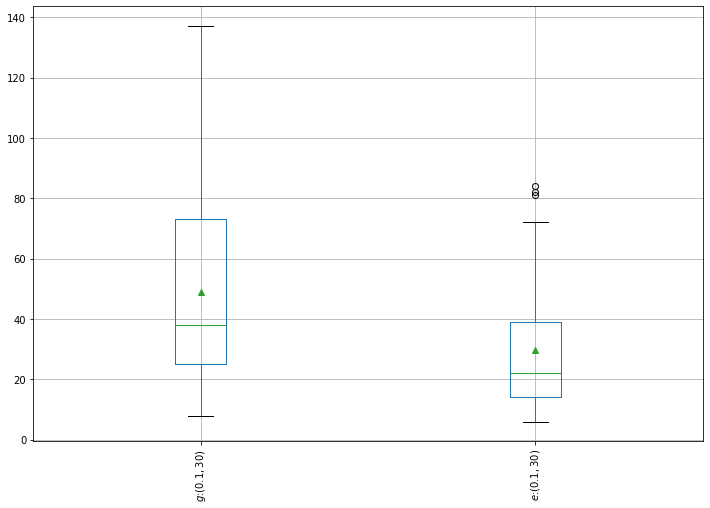

In [10]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["|SSp1|_M", "|SSp1|_P"])
plt.savefig("SSp1.png", bbox_inches="tight")

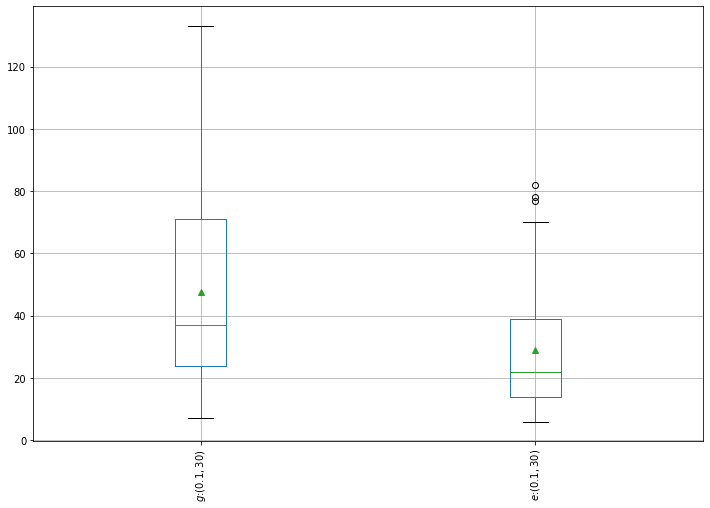

In [12]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["|SR1|_M", "|SR1|_P"])
plt.savefig("SR1.png", bbox_inches="tight")

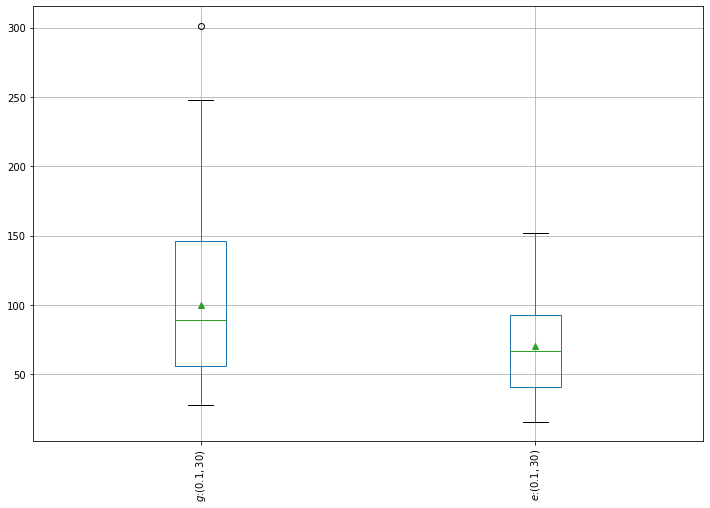

In [11]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["|SSp2|_M", "|SSp2|_P"])
plt.savefig("SSp2.png", bbox_inches="tight")

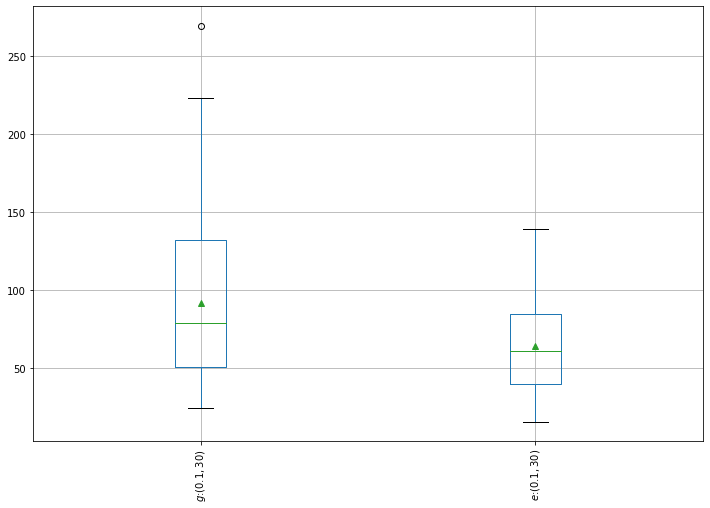

In [13]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["|SR2|_M", "|SR2|_P"])
plt.savefig("SR2.png", bbox_inches="tight")

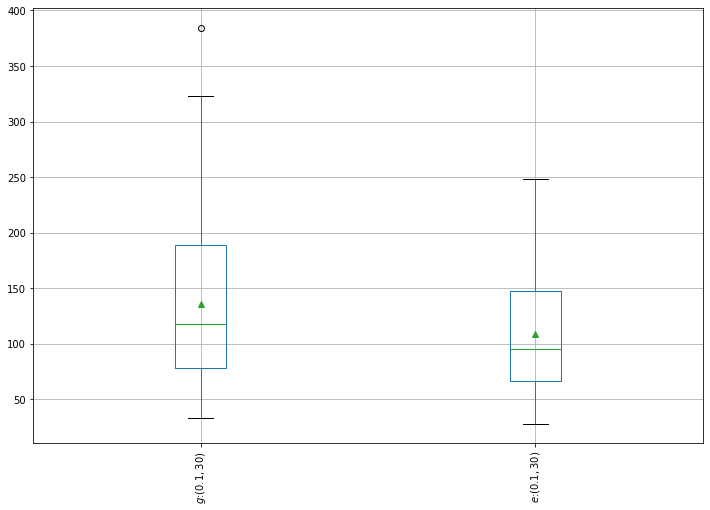

In [39]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["|SSp3|_M", "|SSp3|_P"])
plt.savefig("SSp3.png", bbox_inches="tight")

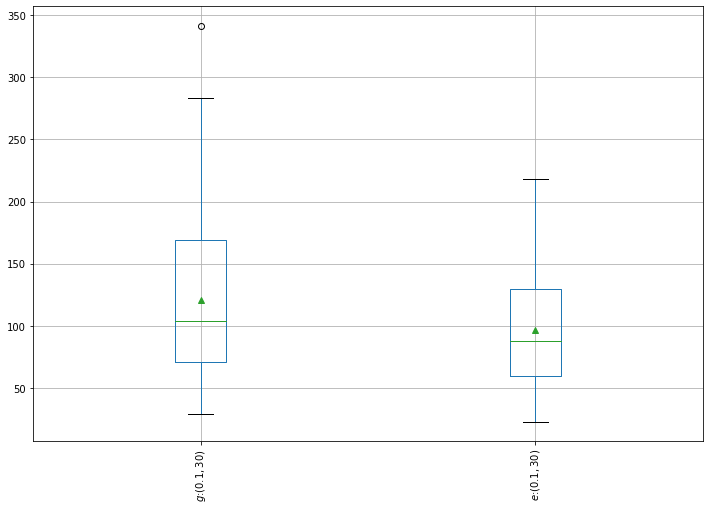

In [40]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["|SR3|_M", "|SR3|_P"])
plt.savefig("SR3.png", bbox_inches="tight")

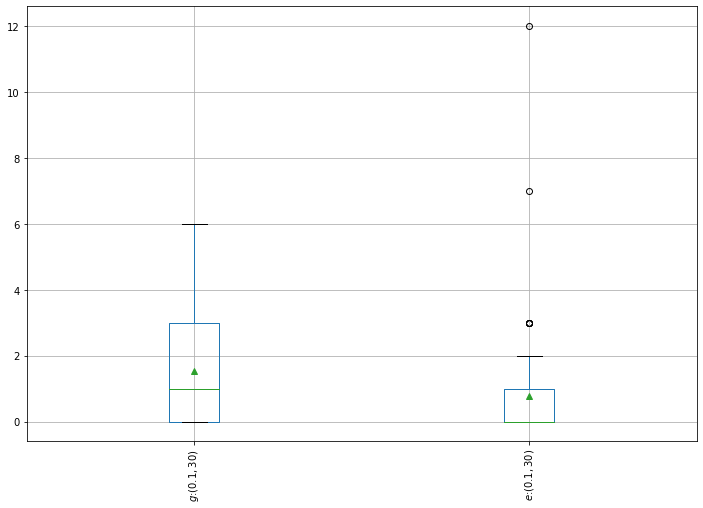

In [25]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["d_spr1_M", "d_spr1_P"])
plt.savefig("d_spr1.png", bbox_inches="tight")

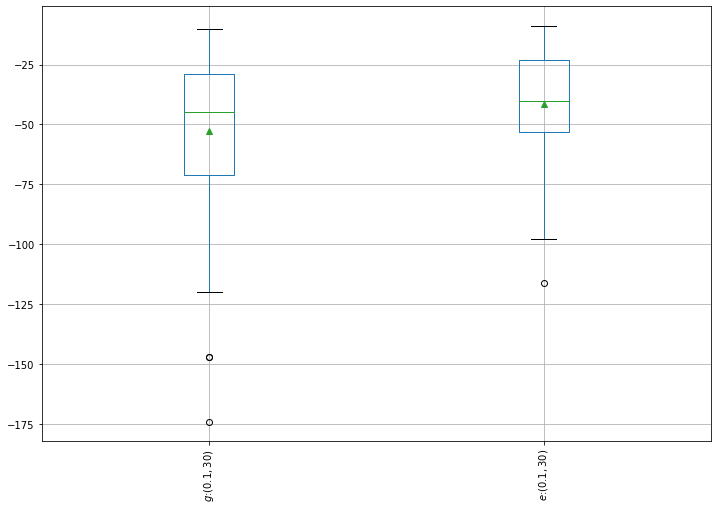

In [30]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["d_rsp1_M", "d_rsp1_P"])
plt.savefig("d_rsp1.png", bbox_inches="tight")

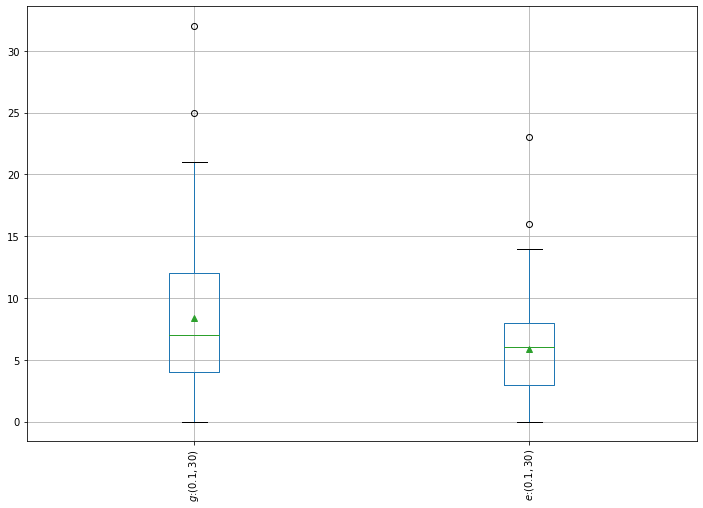

In [27]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["d_spr2_M", "d_spr2_P"])
plt.savefig("d_spr2.png", bbox_inches="tight")

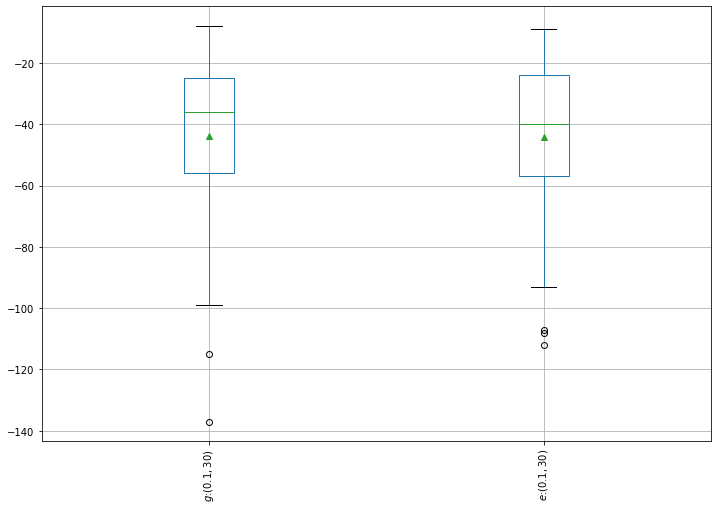

In [32]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["d_rsp2_M", "d_rsp2_P"])
plt.savefig("d_rsp2.png", bbox_inches="tight")

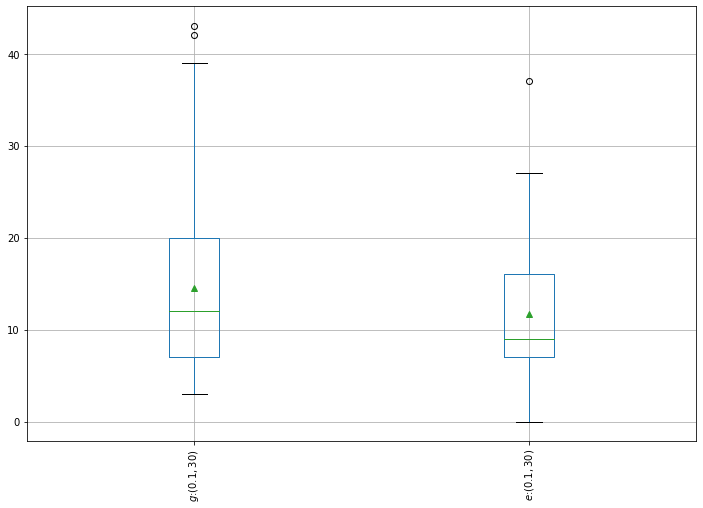

In [29]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["d_spr3_M", "d_spr3_P"])
plt.savefig("d_spr3.png", bbox_inches="tight")

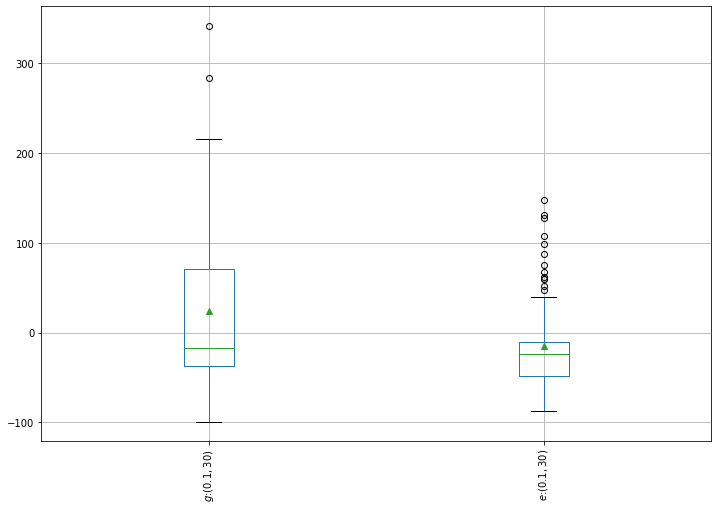

In [33]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$g$:", r"$e$:"],
       ex_cols=["d_rsp3_M", "d_rsp3_P"])
plt.savefig("d_rsp3.png", bbox_inches="tight")